In [1]:
!pip install torch

     -------------------------------------- 161.8/161.8 MB 5.3 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import torch

### Значения тензеров

In [14]:
torch.HalfTensor      # 16 бит, floating point
torch.FloatTensor     # 32 бита, floating point
torch.DoubleTensor    # 64 бита, floating point

torch.ShortTensor     # 16 бит, integer, signed
torch.IntTensor       # 32 бита, integer, signed
torch.LongTensor      # 64 бита, integer, signed

torch.CharTensor      # 8 бит, integer, signed
torch.ByteTensor      # 8 бит, integer, unsigned

torch.ByteTensor

In [2]:
x = torch.IntTensor(4, 4)
x

tensor([[7209071, 7340124, 7274610, 6881382],
        [6619244, 6553695, 6684773, 7667809],
        [7602284, 6815836, 7536745, 7274612],
        [7929970, 7536686, 7078001, 7602281]], dtype=torch.int32)

In [3]:
x1 = torch.IntTensor(2, 3).zero_() #нулевой тензор
x1

tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [4]:
x2 = torch.randn((2,3)) #значения из нормального распределения со средним в 0
x2

tensor([[-0.2991,  0.8268,  2.5316],
        [ 0.1760,  0.2698,  0.3260]])

In [5]:
x.random_(0, 10)                      # Дискретное равномерно U[0, 10]
x.uniform_(0, 1)                      # Равномерно U[0, 1]
x.normal_(mean=0, std=1)              # Нормальное со средним 0 и дисперсией 1
x.bernoulli_(p=0.5)                   # Ьернулли with parameter p

RuntimeError: "check_uniform_bounds" not implemented for 'Int'

In [7]:
x2.view(3,2) # == reshape

tensor([[-0.2991,  0.8268],
        [ 2.5316,  0.1760],
        [ 0.2698,  0.3260]])

### Арифметические операции

+ ~ torch.add()
- ~ torch.sub()
* ~ torch.mul()
/ ~ torch.div()

In [9]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [10]:
a+b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [11]:
a * b

tensor([[-1.0000e+00, -4.0000e+00, -9.0000e+00],
        [-1.0000e+02, -4.0000e+02, -9.0000e+02],
        [ 1.0000e+04,  4.0000e+04,  9.0000e+04]])

In [12]:
a.sub(b) #без изменения а

tensor([[ 2.,  4.,  6.],
        [20., 40., 60.],
        [ 0.,  0.,  0.]])

In [14]:
a.sub_(b) #с изменением а

tensor([[   3.,    6.,    9.],
        [  30.,   60.,   90.],
        [-100., -200., -300.]])

In [15]:
a.sin() #поэлементно

tensor([[ 0.1411, -0.2794,  0.4121],
        [-0.9880, -0.3048,  0.8940],
        [ 0.5064,  0.8733,  0.9998]])

In [16]:
a.exp()

tensor([[2.0086e+01, 4.0343e+02, 8.1031e+03],
        [1.0686e+13, 1.1420e+26,        inf],
        [3.7835e-44, 0.0000e+00, 0.0000e+00]])

In [18]:
a

tensor([[   3.,    6.,    9.],
        [  30.,   60.,   90.],
        [-100., -200., -300.]])

In [17]:
a.sum(dim=1)

tensor([  18.,  180., -600.])

In [19]:
a.sum(dim=0)

tensor([ -67., -134., -201.])

In [20]:
a.mean()

tensor(-44.6667)

### Фиктивные оси

In [21]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

a[:, None, :].shape

torch.Size([3, 1, 3])

In [22]:
a[:, :, None]

tensor([[[  1.],
         [  2.],
         [  3.]],

        [[ 10.],
         [ 20.],
         [ 30.]],

        [[100.],
         [200.],
         [300.]]])

### Матричные операции

In [23]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [25]:
a.t() #транспонирование без замены

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

In [27]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])
a.dot(b) #скалярное произведение ~ a @ b

tensor(-141.)

In [28]:
a @ b

tensor(-141.)

In [29]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])
a.mm(b) #умножение

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [30]:
a @ b

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

## Конветация из Numpy в Pytorch

In [31]:
import numpy as np

a = np.random.rand(3, 3)
a

array([[0.12687311, 0.76410928, 0.77456127],
       [0.90769776, 0.18828299, 0.38886193],
       [0.7860317 , 0.99094642, 0.5966827 ]])

In [33]:
b = torch.from_numpy(a)
b

tensor([[0.1269, 0.7641, 0.7746],
        [0.9077, 0.1883, 0.3889],
        [0.7860, 0.9909, 0.5967]], dtype=torch.float64)

In [34]:
b -= b
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [35]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [36]:
a = torch.FloatTensor(2, 3, 4)
a

tensor([[[1.0469e-38, 9.4592e-39, 8.9082e-39, 1.0561e-38],
         [7.3470e-39, 1.0653e-38, 1.0194e-38, 8.4490e-39],
         [1.1112e-38, 9.5511e-39, 1.0102e-38, 5.2347e-39]],

        [[6.2449e-39, 6.9796e-39, 8.4490e-39, 1.0010e-38],
         [9.9184e-39, 9.6429e-39, 1.0469e-38, 9.0919e-39],
         [1.0561e-38, 9.6429e-39, 9.4592e-39, 1.0286e-38]]])

In [37]:
b = a.numpy()
b

array([[[1.0469359e-38, 9.4592116e-39, 8.9082029e-39, 1.0561235e-38],
        [7.3469686e-39, 1.0653087e-38, 1.0193886e-38, 8.4490198e-39],
        [1.1112207e-38, 9.5510542e-39, 1.0102060e-38, 5.2346947e-39]],

       [[6.2449427e-39, 6.9796042e-39, 8.4490268e-39, 1.0010202e-38],
        [9.9183975e-39, 9.6428896e-39, 1.0469404e-38, 9.0918697e-39],
        [1.0561224e-38, 9.6428882e-39, 9.4592102e-39, 1.0285640e-38]]],
      dtype=float32)

# CUDA

In [38]:
x = torch.FloatTensor(1024, 10024).uniform_()
x

tensor([[0.8737, 0.3129, 0.0503,  ..., 0.6603, 0.7846, 0.5028],
        [0.4257, 0.5114, 0.9973,  ..., 0.6422, 0.0675, 0.8022],
        [0.6177, 0.1215, 0.5944,  ..., 0.4918, 0.6146, 0.5072],
        ...,
        [0.3495, 0.4561, 0.8154,  ..., 0.1876, 0.3484, 0.9065],
        [0.2021, 0.8932, 0.5713,  ..., 0.5187, 0.9054, 0.4821],
        [0.4376, 0.0655, 0.9379,  ..., 0.9922, 0.6585, 0.8310]])

In [41]:
x.is_cuda #находится ли тензон на памяти CUDA

False

In [51]:
!nvidia-smi

Wed Aug 31 13:45:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.15       Driver Version: 512.15       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:1F:00.0  On |                  N/A |
| 29%   34C    P8     7W / 190W |    431MiB /  6144MiB |     10%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [47]:
 torch.cuda.is_available() 

False

In [49]:
torch.cuda.empty_cache()

# AUTOGRAD

## Линейная регрессия цен на жилье в Бостоне

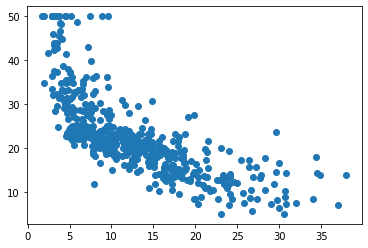

In [53]:
import matplotlib.pyplot as plt
import torch
%matplotlib inline

from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

In [54]:
w = torch.zeros(1, requires_grad=True) # матрица весов
b = torch.zeros(1, requires_grad=True) # матрица свободных членов

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32) # матррица признаков
y = torch.tensor(boston.target, dtype=torch.float32) # правильные ответы

In [55]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

loss.backward() #вычисляем градиенты, от которых зависит Loss

In [56]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-47.3514])
dL/db = 
 tensor([-45.0656])


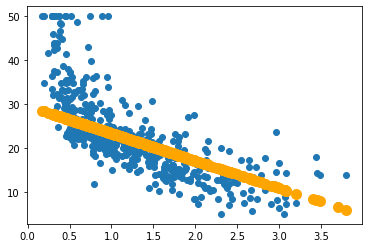

loss =  44.59417


In [57]:
from IPython.display import clear_output

for i in range(100):

    y_pred = w * x + b

    # Вычисляем функцию ошибок
    loss = torch.mean((y_pred - y)**2)

    # Вычисляем градиенты
    loss.backward()


    # Делаем шаг градиентного спуска по матрице весов
    w.data -= 0.05*w.grad.data
    b.data -= 0.05*b.grad.data

    # обнуляем градиенты
    w.grad.data.zero_()
    b.grad.data.zero_()



    # the rest of code is just bells and whistles
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break